# A Simple Scikit-Learn Classification Workflow

<img src="../images/sklearn-workflow.png"/>

### Step by step : 
0. An end-to-end Scikit-learn workflow
1. Getting data ready
2. Choose the right estimator/algorithm for out problems
3. Fit the model/algorithm and use it to make predictions on our data
4. Evaluating a model
5. Improve model
6. Save and load a trained model
7. Putting it all together

## Import relevant Libraries

In [1]:
import pandas as pd
import numpy as np

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import sklearn
sklearn.show_versions()


System:
    python: 3.6.9 (default, Jul 17 2020, 12:50:27)  [GCC 8.4.0]
executable: /usr/bin/python3
   machine: Linux-5.4.0-42-generic-x86_64-with-LinuxMint-19.3-tricia

Python dependencies:
          pip: 20.2
   setuptools: 49.2.0
      sklearn: 0.23.2
        numpy: 1.18.5
        scipy: 1.5.2
       Cython: None
       pandas: 1.0.5
   matplotlib: 3.3.0
       joblib: 0.16.0
threadpoolctl: 2.1.0

Built with OpenMP: True


## 0. An end-to-end Sklearn workflow

In [4]:
# 1. Get data to ready

heart_disease = pd.read_csv("../data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
# Create features matrix
x = heart_disease.iloc[:,:-1]
# Create labels 
y = heart_disease["target"]

In [6]:
#2. Choose the right model and hyperparameter
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
# We'll keep the default hyperparameter
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [7]:
#3. Fit model to data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=10, train_size=0.8, shuffle=True)

In [8]:
clf.fit(x_train,y_train)

RandomForestClassifier()

In [9]:
#4. make a prediction
y_predict = clf.predict(x_test)
y_predict

array([0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1])

In [10]:
#4. Evaluate the model on the training data and test data
clf.score(x_train,y_train)

1.0

In [11]:
clf.score(x_test,y_test)

0.7868852459016393

In [12]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.84      0.77      0.81        35
           1       0.72      0.81      0.76        26

    accuracy                           0.79        61
   macro avg       0.78      0.79      0.78        61
weighted avg       0.79      0.79      0.79        61



In [13]:
pd.DataFrame(confusion_matrix(y_test, y_predict), columns=["0","1"], index=["0","1"])


,0,1
0,27,8
1,5,21


In [14]:
accuracy_score(y_test,y_predict)

0.7868852459016393

In [15]:
#5. Improve model
# Try diffenrent amount of n_estimators
np.random.seed(42)
for i in range(10,100,10) : 
    clf = RandomForestClassifier(n_estimators=i)
    clf.fit(x_train,y_train)
    print(f"Model accuracy test set with {i} estimators : {clf.score(x_test, y_test)*100:.2f}%")

Model accuracy test set with 10 estimators : 81.97%
Model accuracy test set with 20 estimators : 81.97%
Model accuracy test set with 30 estimators : 81.97%
Model accuracy test set with 40 estimators : 80.33%
Model accuracy test set with 50 estimators : 81.97%
Model accuracy test set with 60 estimators : 80.33%
Model accuracy test set with 70 estimators : 78.69%
Model accuracy test set with 80 estimators : 78.69%
Model accuracy test set with 90 estimators : 77.05%


In [16]:
#6. Save model and load it
import pickle 
pickle.dump(clf, open("../models/random-forest-model-1.pkl","wb"))

In [17]:
loaded_model = pickle.load(open("../models/random-forest-model-1.pkl", "rb"))
loaded_model.score(x_test,y_test)

0.7704918032786885

In [18]:
loaded_model.predict(x_test)

array([0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1])

## 1. Getting our data ready to be used with machine learning
**3 main things we have to do:**
   1. Split the data into features and labels (usually "x" , "y")
   2. Filling (also called imputing) or disregarding missing values
   3. Converting non-numerical values to numericals values( also call featuring coding)

In [19]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [20]:
x = heart_disease.drop("target",axis=1)
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [21]:
y = heart_disease["target"]
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [22]:
# split the data into trainning and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8)

In [23]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((242, 13), (242,), (61, 13), (61,))

In [24]:
x.shape, x.shape[0] * 0.8

((303, 13), 242.4)

In [25]:
len(heart_disease)

303

### Make sure all features are numerical

In [26]:
car_sales = pd.read_csv("../data/car-sales-extended.csv")

In [27]:
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [28]:
len(car_sales)

1000

In [29]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [30]:
# split data into x, y
x = car_sales.drop("Price", axis=1)
y = car_sales["Price"]

In [31]:
x.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [32]:
# Turn the categories into number
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_features= ["Make", "Colour", "Doors"]
# initiate OneHotEncoder
one_hot= OneHotEncoder()
transformer = ColumnTransformer([("one_hot",one_hot,categorical_features)], remainder="passthrough")
transformed_x = transformer.fit_transform(x)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [33]:
# otherwise, we can use pd.get_dummies method , but Doors can't convert numerical features because it is numerical
dummies = pd.get_dummies(car_sales[["Make","Colour","Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [34]:
# Let's refit model
np.random.seed(42)
# split into trainning and test set
x_train , x_test, y_train, y_test = train_test_split(transformed_x,y,train_size=0.8)

In [35]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_train,y_train)

RandomForestRegressor()

In [36]:
model.score(x_test,y_test)

0.3235867221569877

### What if there were missing values? 
    1. Fill them with some value ( also known as imputation) 
    2. Remove the samples with missing data altogether

In [37]:
# import car sale missing data
car_sales_missing= pd.read_csv("../data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [38]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [39]:
# Create x,y
x = car_sales_missing.drop("Price",axis=1)
y = car_sales_missing["Price"]

In [40]:
# Let's try and convert out data to numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()

transformer = ColumnTransformer(transformers=[("one_hot", one_hot, categorical_features)], remainder="passthrough")

In [41]:
car_sales_missing["Doors"].mean().round().astype(int)

4

#### Option1 : Filling missing data with Pandas

In [42]:
# Fill "Make" column
car_sales_missing["Make"].fillna("missing", inplace=True)
# Fill "Colour" column
car_sales_missing["Colour"].fillna("missing", inplace=True)
# Fill "Odometer (KM)" column
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace=True)
#Fill the "Doors" column
car_sales_missing["Doors"].fillna(car_sales_missing["Doors"].mean().round().astype(int), inplace=True)
car_sales_missing["Doors"] = car_sales_missing["Doors"].astype(int)

In [43]:
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [44]:
# Remove rows  with missing Price value
car_sales_missing.dropna(axis=0, inplace=True)

In [45]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

### Filling missing values with Scikit-Learn

In [46]:
car_sales_missing = pd.read_csv("../data/car-sales-extended-missing-data.csv")

In [47]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [48]:
car_sales_missing.dropna(subset=["Price"],axis=0, inplace=True)

In [49]:
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [50]:
# Split into x,y
x = car_sales_missing.drop("Price",axis=1)
y = car_sales_missing["Price"]

In [51]:
# Fill missing values with Scikit-Learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with "missing" and numerical values with mean
categorical_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant",fill_value=x["Doors"].mean().round(0).astype(int))
numerical_imputer = SimpleImputer(strategy="mean")

# Define columns
categorical_features = ["Make","Colour"]
door_features = ["Doors"]
numerical_features = ["Odometer (KM)"]

# Create an imputer (something that fill missing values)
imputer_transformer = ColumnTransformer(transformers=[("categorical_imputer", categorical_imputer, categorical_features), 
                                                      ("door_imputer", door_imputer, door_features),
                                                      ("numerical_imputer", numerical_imputer, numerical_features)
                                                     ],                                         
                                       )
# Transform data
filled_x = imputer_transformer.fit_transform(x)

In [52]:
car_sales_filled= pd.DataFrame(filled_x, columns=["Make","Colour","Doors","Odometer (KM)"])
car_sales_filled

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4,35431
1,BMW,Blue,5,192714
2,Honda,White,4,84714
3,Toyota,White,4,154365
4,Nissan,Blue,3,181577
...,...,...,...,...
945,Toyota,Black,4,35820
946,missing,White,3,155144
947,Nissan,Blue,4,66604
948,Honda,White,4,215883


In [53]:
# Let's try to convert out data to numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

one_hot = OneHotEncoder()
categorical_features = ["Make", "Colour", "Doors"]

transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")

transformed_x = transformer.fit_transform(car_sales_filled)

In [54]:
# Now we've got our data as numbers and filled(no missing value)
# Let's fit a model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

x_train, x_test , y_train, y_test = train_test_split(transformed_x, y, train_size=0.8)
model = RandomForestRegressor(n_estimators=100)
model.fit(x_train, y_train)

RandomForestRegressor()

In [55]:
model.score(x_test,y_test)

0.21990196728583944

## 2. Choose the right estimator/algorithm for out problems
Scikit-Learn uses estimator as another term for ML model of algorithm
   * Classification: predicting whether a sample is one thing or another (e.g : predicting a person has disease or not)
   * Regression: predicting a number (e.g: predicting the price of the house)
   
**Check Scikit-learn map...https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html**

<img src="../images/ml_map.png"/>

### 2.1 Picking a ML model for regression problem

In [56]:
# Import Boston housing in datasets
from sklearn.datasets import load_boston
boston = load_boston()
boston;

In [57]:
boston_df = pd.DataFrame(boston["data"], columns=boston["feature_names"])
boston_df["target"] = boston["target"]
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [58]:
# how many samples ? 
len(boston_df)

506

In [59]:
from sklearn.linear_model import Ridge

# Setup random seed
np.random.seed(42)

# Create data
x = boston_df.drop("target",axis=1)
y = boston_df["target"]

# split data into trainning and test set
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8)
# Instantiate Ridge model
model = Ridge()
model.fit(x_train, y_train)

#Check the score of the Ridge model on test data
model.score(x_test, y_test)

0.6662221670168523

1. How to improve score ? 
2. What if Ridge wasn't working?

In [60]:
# Let's try Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Create data
x = boston_df.drop("target",axis=1)
y = boston_df["target"]

x_train,x_test, y_train, y_test = train_test_split(x,y,train_size=0.8)

# Instantate Random Forest model
clf = RandomForestRegressor()
clf.fit(x_train,y_train)
# Check the score of the model
clf.score(x_test,y_test)

0.8654448653350507

### 2.2 Choosing an estimator for a classification problem
**Check Scikit-learn map...https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html**


In [61]:
heart_disease = pd.read_csv("../data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [62]:
# sample > 50 
len(heart_disease) 

303

In [63]:
# Import LinearSVC estimator class
from sklearn.svm import LinearSVC

# Setup random seed
np.random.seed(42)

x = heart_disease.drop("target",axis=1)
y = heart_disease["target"]


# Split data into trainning and test set
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8)

# Instantiate LinearSVC model
clf = LinearSVC(max_iter=1000)
clf.fit(x_train,y_train)

# Get the score of the test model
clf.score(x_test, y_test)



0.8688524590163934

In [64]:
heart_disease["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

1. The score seem pretty good 
2. Try to improve the score

In [65]:
# Let's try Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

#Split data into trainning and test set
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8)

# Instantiate RandomForestClassifier model
clf = RandomForestClassifier()
clf.fit(x_train,y_train)

# Check the score of model
clf.score(x_test, y_test)

0.819672131147541

Tidbit: 
 1. If you have structured data, used ensemble methods
 2. If you have unstructured data, use deep learning or transfer learning

## 3. Fit the model/ algorithm on out data and us it  to make predictions

### 3.1 Fitting the model data

`x` = fetures,  features variables

`y` = labels, targets, target variables

In [66]:
# Let's try Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

np.random.seed(42)
#Split data into trainning and test set
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8)

# Instantiate RandomForestClassifier model
clf = RandomForestClassifier()
# Fit the model (trainning machine learning model)
clf.fit(x_train,y_train)

# Evaluate model (use  the pattenrn of the model has learned)
clf.score(x_test, y_test)

0.8524590163934426

In [67]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

### 3.2 Make predictions using machine learning model
2 methods to make predictions : 
   1. `predict()`
   2. `predict_proba()`

In [68]:
# Use a trained model to make prediction
clf.predict(x_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [69]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [70]:
# Compare predictions to truth labels to evaluate the model
y_preds = clf.predict(x_test)
np.mean(y_preds == y_test)

0.8524590163934426

In [71]:
# Evaluate model (use  the pattenrn of the model has learned)
clf.score(x_test, y_test)

0.8524590163934426

In [72]:
from sklearn.metrics import confusion_matrix ,accuracy_score
print(accuracy_score(y_preds, y_test))
print(pd.DataFrame(confusion_matrix(y_test, y_preds), columns=["Actual_0","Actual_1"], index=["Predict_0","Predict_1"]) )

0.8524590163934426
           Actual_0  Actual_1
Predict_0        24         5
Predict_1         4        28


In [73]:
# make predictions with predict_proba()
y_preds_proba = clf.predict_proba(x_test)
y_preds_proba[:5]

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [74]:
np.array(y_test[:5])

array([0, 0, 1, 0, 1])

#### Making prediction with regression model

In [75]:
# Let's try Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Create data
x = boston_df.drop("target",axis=1)
y = boston_df["target"]

x_train,x_test, y_train, y_test = train_test_split(x,y,train_size=0.8)

# Instantate Random Forest model
clf = RandomForestRegressor()
clf.fit(x_train,y_train)
# Check the score of the model
clf.score(x_test,y_test)

0.8654448653350507

In [76]:
y_preds = clf.predict(x_test)
y_preds

array([23.081, 30.574, 16.759, 23.46 , 16.893, 21.644, 19.113, 15.334,
       21.14 , 20.639, 19.787, 19.541,  8.583, 21.85 , 19.531, 25.851,
       19.759,  8.22 , 45.109, 14.712, 24.548, 23.956, 14.548, 22.944,
       15.023, 14.643, 21.137, 14.153, 19.232, 20.666, 19.588, 23.254,
       33.01 , 20.461, 14.271, 15.889, 34.704, 19.154, 20.85 , 24.395,
       18.978, 29.84 , 45.302, 19.447, 22.234, 13.751, 15.511, 24.612,
       18.729, 28.235, 21.21 , 34.218, 17.271, 26.147, 45.279, 21.924,
       15.532, 32.412, 22.212, 20.453, 25.532, 34.326, 28.795, 18.951,
       27.145, 17.181, 13.534, 23.04 , 28.714, 15.802, 20.451, 27.87 ,
       10.193, 21.507, 22.383,  7.265, 20.089, 45.388, 10.88 , 13.053,
       21.322, 12.366, 20.233,  9.135, 20.052, 26.787, 15.277, 23.267,
       23.613, 17.699, 21.617,  7.921, 19.475, 18.807, 22.386, 19.836,
       38.714, 13.159, 12.476, 13.612, 20.205, 23.832])

In [77]:
# Compare the prediction to truth label
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

2.136382352941176

## 4. Evaluating a model
There are 3 different APIs for evaluating the quality of a model’s predictions: 
   1. Estimator score method
   2. Scoring parameter
   3. Metric functions
   
https://scikit-learn.org/stable/modules/model_evaluation.html

### 4.1 Evaluating model using `Estimator score method`

In [78]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8)

clf = RandomForestClassifier().fit(x_train, y_train)

In [79]:
clf.score(x_test, y_test)

0.8524590163934426

In [80]:
# Let's do the same but for regression 
from sklearn.ensemble import RandomForestRegressor

# Get data ready 
x = boston_df.drop("target", axis=1)
y = boston_df["target"]

# Split data into trainning and test set
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8)

# Instantiate model
reg = RandomForestRegressor().fit(x_train, y_train)

In [81]:
reg.score(x_test,y_test)


0.8494501439301596

### 4.2 Evaluating model using `Scoring parameter`

In [82]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8)

clf = RandomForestClassifier().fit(x_train, y_train)

In [83]:
clf.score(x_test, y_test)

0.8524590163934426

In [84]:
cross_val_score(clf, x_test, y_test, cv=10)

array([0.85714286, 0.83333333, 1.        , 0.66666667, 0.83333333,
       0.5       , 0.83333333, 0.66666667, 0.83333333, 1.        ])

In [85]:
np.random.seed(42)

# Single trainning and test split score
clf_single_score = clf.score(x_test,y_test)

# Take the mean of 5 fold cross_val_score
clf_cross_val_score = cross_val_score(clf,x_test,y_test,cv=5).mean()

# Compare Two 
print(clf_single_score, clf_cross_val_score)

0.8524590163934426 0.8025641025641026


In [86]:
# Scoring parameter set to None by default 
cross_val_score(clf,x_test,y_test, scoring=None)

array([0.76923077, 0.75      , 0.75      , 0.91666667, 0.91666667])

### 4.2.1 Classification model evaluation metrics

1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

**Accuracy**

In [87]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import  RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier(n_estimators=100)
cross_val_score = cross_val_score(clf,x,y, cv=5)
cross_val_score

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [88]:
print(f"Heart disease Classification Cross-validation mean: {cross_val_score.mean()*100:.2f}%")

Heart disease Classification Cross-validation mean: 82.48%


**Area under receiver opeation characteristic curve (AUC/ROC)**

* Area under curve (AUC)
* ROC curve

ROC curve are a comparison of model's true positive rate (TPR) versus a models's false rate (FPR)

* True positive = model predicts 1 when truth is 1 
* False positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1

In [89]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.8)

In [90]:
from sklearn.metrics import roc_curve

np.random.seed(42)

clf.fit(x_train,y_train)

# Making prediction with propability
y_probs = clf.predict_proba(x_test)

In [91]:
y_prob_positive = y_probs[:,1]
y_prob_positive[:10]

array([0.41, 0.81, 0.48, 0.27, 0.51, 0.88, 0.68, 0.03, 0.83, 0.54])

In [92]:
from sklearn.metrics import roc_curve


fpr, tpr, thresholds = roc_curve(y_test, y_prob_positive)

fpr, tpr

(array([0.        , 0.        , 0.03448276, 0.03448276, 0.03448276,
        0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
        0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.17241379,
        0.17241379, 0.20689655, 0.24137931, 0.24137931, 0.31034483,
        0.34482759, 0.34482759, 0.37931034, 0.37931034, 0.48275862,
        0.48275862, 0.55172414, 0.55172414, 0.5862069 , 0.65517241,
        0.75862069, 0.86206897, 0.89655172, 0.96551724, 1.        ]),
 array([0.     , 0.03125, 0.0625 , 0.1875 , 0.3125 , 0.4375 , 0.46875,
        0.5    , 0.53125, 0.59375, 0.59375, 0.625  , 0.625  , 0.6875 ,
        0.6875 , 0.71875, 0.75   , 0.75   , 0.84375, 0.84375, 0.84375,
        0.90625, 0.90625, 0.9375 , 0.9375 , 0.96875, 0.96875, 1.     ,
        1.     , 1.     , 1.     , 1.     , 1.     , 1.     , 1.     ]))

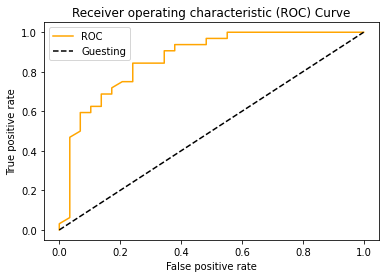

In [100]:
# Create a function for plotting ROC curve
import matplotlib.pyplot as plt

def plotting_roc_curve(fpr, tpr) : 
    plt.plot(fpr, tpr, color="orange", label="ROC")
    plt.plot([0,1], [0,1], "--k", label="Guesting")
    plt.title("Receiver operating characteristic (ROC) Curve")
    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate")
    plt.legend()
    plt.show()
plotting_roc_curve(fpr,tpr)

In [102]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_prob_positive)

0.8658405172413793

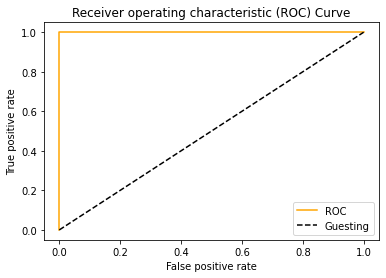

In [109]:
# Plot perfect ROC curve and AUC curve

fpr, tpr, thresholds = roc_curve(y_test, y_test)
fpr, tpr
plotting_roc_curve(fpr,tpr)

In [111]:
# Perfect AUC score 
roc_auc_score(y_test,y_test)

1.0

**Confusion matrix**

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict.

In essence, giving you an idea of when the model is getting confused

In [117]:
from sklearn.metrics import  confusion_matrix

y_preds = clf.predict(x_test)

confusion_matrix(y_test, y_preds)

array([[22,  7],
       [ 7, 25]])

In [120]:
# Visualize confusion matrix with pd.crosstab()

pd.crosstab(y_test,
            y_preds,
            rownames=["Actual label"],
            colnames=["Predict label"]
           )

Predict label,0,1
Actual label,,
0,22,7
1,7,25


Text(79.18, 0.5, 'Predict label')

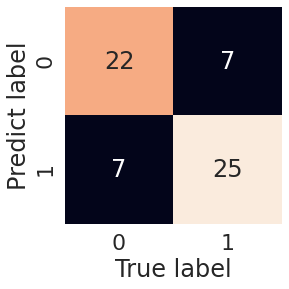

In [128]:
# Make out confusion matrix with seaborn
import seaborn as sns 

# Set font scale
sns.set(font_scale=2)

# Create a confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)

# Plot with using sns
sns.heatmap(conf_mat, annot=True, square=True,cbar=False)
plt.xlabel("True label")
plt.ylabel("Predict label")

**Classification Report**

In [131]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.76      0.76      0.76        29
           1       0.78      0.78      0.78        32

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61

